# California Housing

In [3]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn as sk

from pylab import *
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [4]:
hdata = fetch_california_housing()
    
print(hdata['DESCR'])
    
x_data = hdata['data']
y_data = hdata['target']
    
feat_names = hdata['feature_names']

California housing dataset.

The original database is available from StatLib

    http://lib.stat.cmu.edu/datasets/

The data contains 20,640 observations on 9 variables.

This dataset contains the average house value as target variable
and the following input variables (features): average income,
housing average age, average rooms, average bedrooms, population,
average occupation, latitude, and longitude in that order.

References
----------

Pace, R. Kelley and Ronald Barry, Sparse Spatial Autoregressions,
Statistics and Probability Letters, 33 (1997) 291-297.




### Plot the Univariate Feature Distributions:

Text(0.5,1,'Target Distribution')

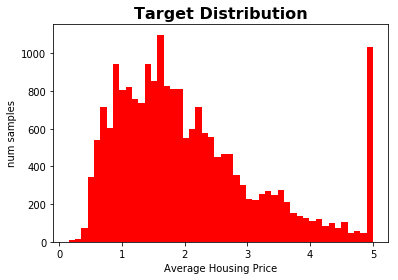

In [5]:
# Plot target Distribution
plt.hist(y_data,bins=48,color='r')
plt.xlabel('Average Housing Price')
plt.ylabel('num samples')
plt.title('Target Distribution', size = 16, weight = 'bold')

Text(0.5,1,'Feature Distributions')

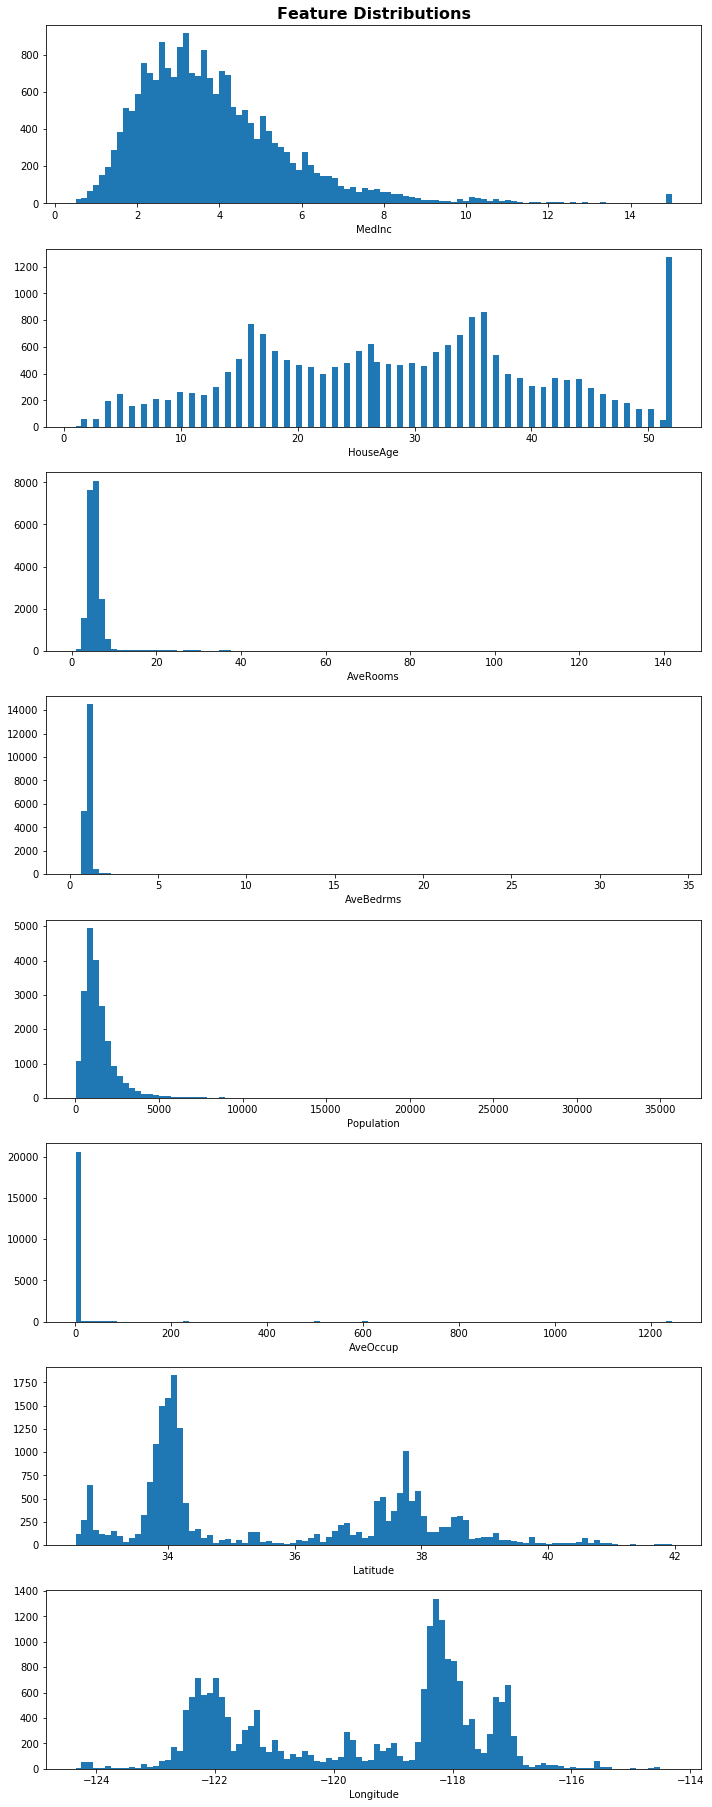

In [6]:
fig1, axes1 = plt.subplots(nrows=np.shape(feat_names)[0], ncols=1)

for i, ax in enumerate(axes1):
    ax.hist(x_data[:,i], 100, range = (x_data[:,i].min(),x_data[:,i].max()))
    ax.set_xlabel(feat_names[i])
    
fig1.set_figheight(25)
fig1.set_figwidth(10)
fig1.tight_layout()

axes1[0].set_title('Feature Distributions', size = 16, weight = 'bold')

### Plot the Target vs. Feature Distributions:

It is clear from the plots that the datasets contain many outliers, which may make our attempt to fit an accurate model more challenging.

Text(0.5,1,'Feature vs. Target Distributions')

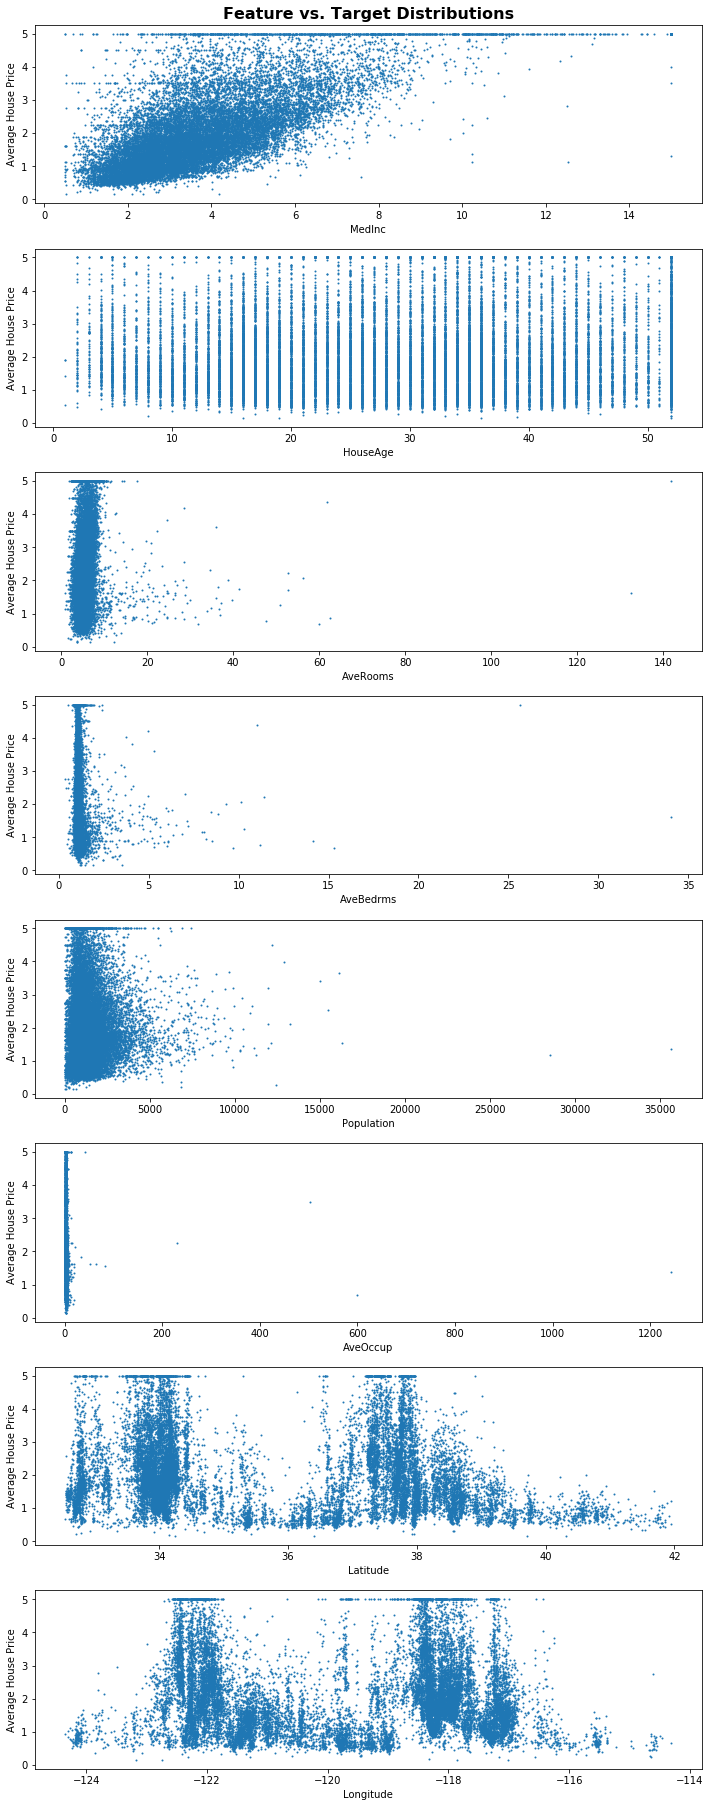

In [7]:
fig2, axes2 = plt.subplots(nrows=np.shape(feat_names)[0], ncols=1)

for i, ax in enumerate(axes2):
    ax.scatter(x_data[:,i], y_data, s=1)
    ax.set_xlabel(feat_names[i])
    ax.set_ylabel('Average House Price')
    
    
fig2.set_figheight(25)
fig2.set_figwidth(10)
fig2.tight_layout()

axes2[0].set_title('Feature vs. Target Distributions', size = 16, weight = 'bold')

### Split the data.

In [8]:
def split(x_data,y_data):
    x_training, x_test, y_training, y_test = train_test_split(x_data, y_data)
    #x_train, x_val, y_train, y_val = train_test_split(x_training, y_training, random_state=0)
    return x_training,y_training,x_test,y_test

train_data = split(x_data,y_data)

#scale the feature data
scaler = StandardScaler()
scaled_train_data = split(scaler.fit_transform(x_data),y_data)


### Apply Linear Regression

In [9]:
from sklearn import linear_model

def linear_reg(data):
    reg = linear_model.LinearRegression().fit(data[0],data[1])
    reg_score = reg.score(data[2],data[3])
    return reg_score

print('Linear Regression Score = ',linear_reg(train_data))
print('\n','With scaled data =',linear_reg(scaled_train_data))

Linear Regression Score =  0.595176244281727

 With scaled data = 0.6097286192344482


### Apply Ridge Regression

Predictions using the scaled data were worse.

In [10]:
def ridge_reg(data,alpha):
    clf = linear_model.Ridge(alpha=alpha)
    clf.fit(data[0],data[1])
    ridge_score = clf.score(data[2],data[3])
    return ridge_score

print('Ridge Regression Score = ',ridge_reg(train_data,0.01))
print('\n','With scaled data =',ridge_reg(scaled_train_data,0.01))

Ridge Regression Score =  0.5951761018053587

 With scaled data = 0.609728628328766


### Apply Lasso Regression

Predictions using the scaled data were worse.

In [11]:
def lasso_reg(data,alpha):
    lasso_reg = linear_model.Lasso(alpha=alpha)
    lasso_reg.fit(data[0],data[1])
    lasso_score = lasso_reg.score(data[2],data[3])
    return lasso_score

print('Lasso Regression Score = ',lasso_reg(train_data,0.01))
print('\n','With scaled data =', lasso_reg(scaled_train_data,0.01))

Lasso Regression Score =  0.5879174255897427

 With scaled data = 0.605360497080045


### Apply ElasticNet Regression

Predictions using the scaled data were worse.

In [12]:
def elastic_reg(data,alpha):
    elastic = linear_model.ElasticNet(alpha = alpha, random_state = 0)
    elastic.fit(data[0],data[1])
    elastic_score = elastic.score(data[2],data[3])
    return elastic_score

print('ElasticNet Regression Score = ',elastic_reg(train_data,0.01))
print('\n','With scaled data =',elastic_reg(scaled_train_data,0.01))



ElasticNet Regression Score =  0.5910431621984378

 With scaled data = 0.6073486922559712


## Now let's do grid search optimization on the three tunable models:

In [13]:
def gridscv(model,params,data):
    gs = GridSearchCV(model,params,return_train_score=True,cv=3)
    gs.fit(data[0],data[1])
    scores = gs.cv_results_['split0_train_score']
    plt.plot(params['alpha'],scores)

    gs.fit(scaled_train_data[0],scaled_train_data[1])
    scores = gs.cv_results_['split0_train_score']
    plt.plot(params['alpha'],scores)
    plt.legend(('unscaled','scaled'))
    
    print('best parameters: ', gs.best_params_)
    
    return gs.best_params_

### Elastic:

Tune paramater 'alpha'.

best parameters:  {'alpha': 0.03696912707195032}


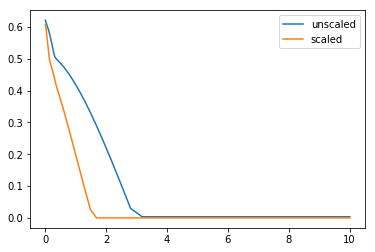

In [14]:
pmin = -10
pmax = 1
pstep = 200

elastic_params = {'alpha': np.logspace(pmin,pmax,pstep)}
elastic = linear_model.ElasticNet()  

elastic_best_p = gridscv(elastic, elastic_params,[x_data,y_data])

### Lasso:

best parameters:  {'alpha': 0.11}


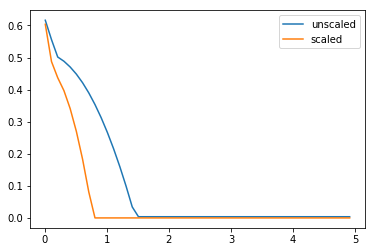

In [15]:
pmin = .01
pmax = 5
pstep = .1

lasso_params = {'alpha': np.arange(pmin,pmax,pstep)}
lasso = linear_model.Lasso()  

lasso_best_p = gridscv(lasso, lasso_params,[x_data,y_data])

### Ridge:

Tuning has no effect.

best parameters:  {'alpha': 4.91}


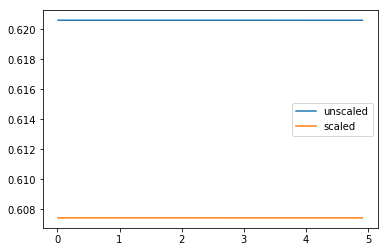

In [16]:
pmin = .01
pmax = 5
pstep = .1

ridge_params = {'alpha': np.arange(pmin,pmax,pstep)}
ridge = linear_model.Ridge()  

ridge_best_p = gridscv(ridge, ridge_params, [x_data,y_data])

### Visualize the decision boundaries for each classifier. 

In [23]:
def make_meshgrid(x, y, h=.5):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


def visualize_classification(feature1,feature2):

    X = train_data[0][:,feature1:feature2]
    y = train_data[1][:]

    # we create an instance of SVM and fit out data. We do not scale our
    # data since we want to plot the support vectors
    models = (linear_model.Ridge(alpha = ridge_best_p['alpha']),
              linear_model.Lasso(alpha = lasso_best_p['alpha']),
              linear_model.ElasticNet(alpha = elastic_best_p['alpha']),
              linear_model.LinearRegression())
    models = (clf.fit(X, y) for clf in models)

    # title for the plots
    titles = ('Ridge',
              'Lasso',
              'ElasticNet',
              'linear')

    # Set-up 2x2 grid for plotting.
    fig, sub = plt.subplots(2, 2)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    X0, X1 = X[:, 0], X[:, 1]
    xx, yy = make_meshgrid(X0, X1)

    for clf, title, ax in zip(models, titles, sub.flatten()):
        plot_contours(ax, clf, xx, yy,
                      cmap=plt.cm.coolwarm, alpha=0.8)
        ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xlabel('Feature '+str(feature1))
        ax.set_ylabel('Feature '+str(feature2))
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(title)

    fig.set_figheight(20)
    fig.set_figwidth(20)


### Choose features to visualize.

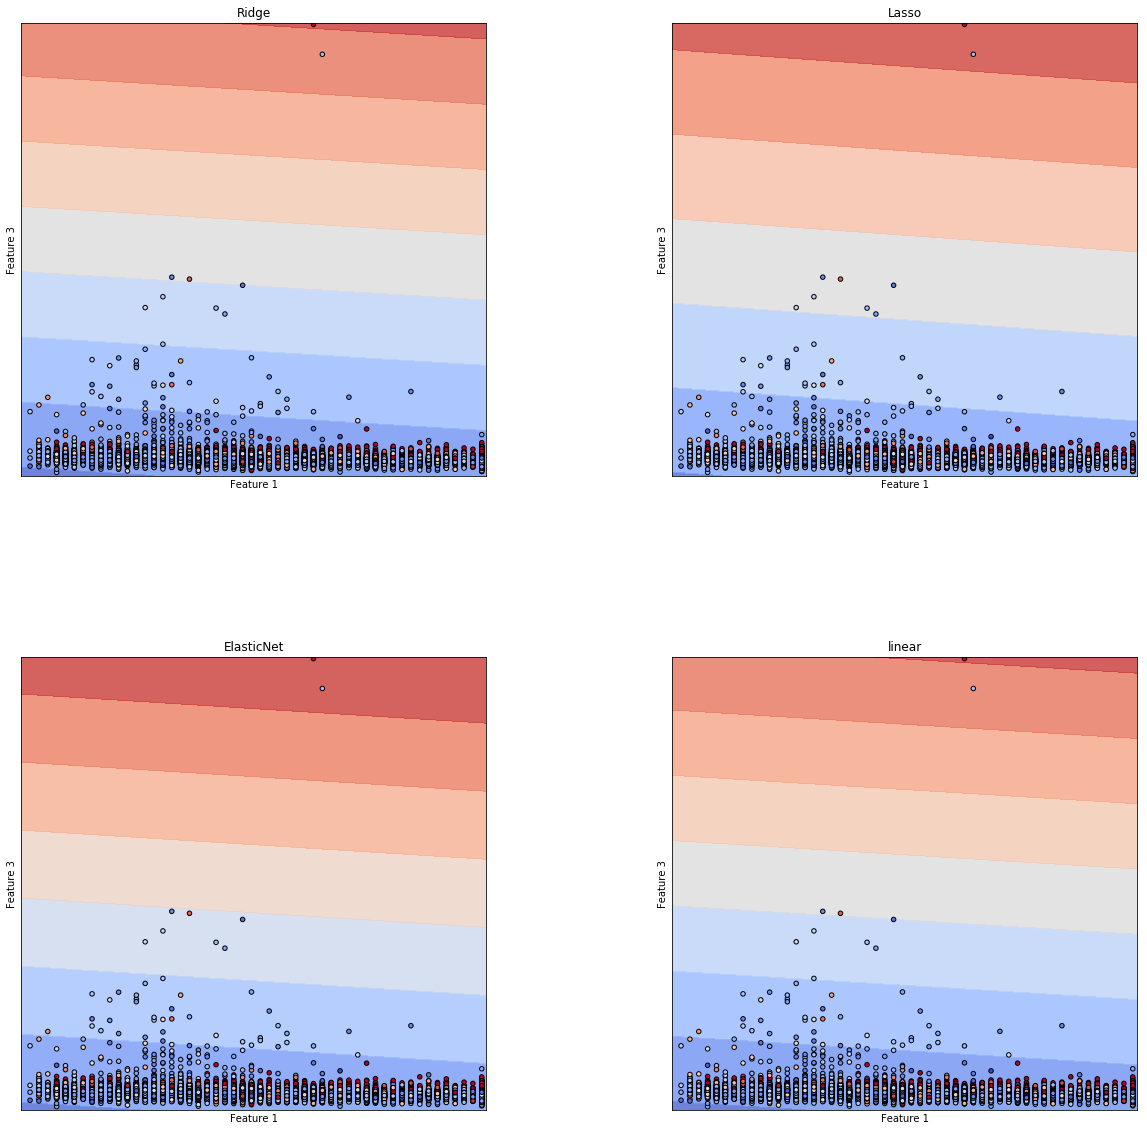

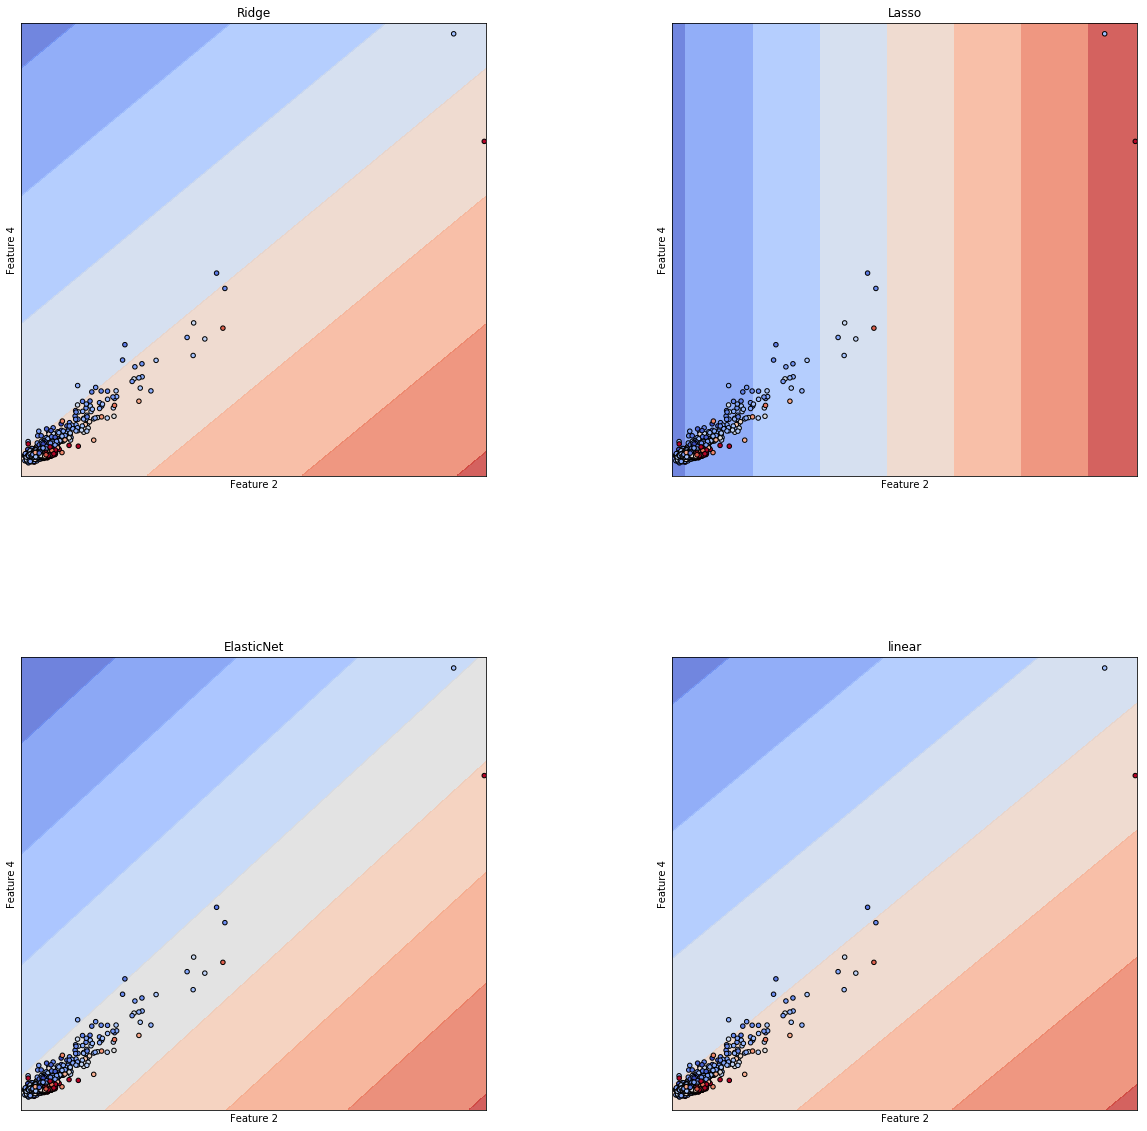

In [24]:
visualize_classification(1,3)
visualize_classification(2,4)

Didn't get to visualizing coefficients...